# Модуль NumPy. Операции с векторами

## ВЕКТОРЫ В NUMPY И АРИФМЕТИКА

Операция, применённая к двум векторам, на самом деле применяется поэлементно. То есть при сложении двух векторов первым элементом нового вектора будет сумма первых элементов исходных векторов, вторым — сумма вторых элементов и т. д.

In [166]:
import numpy as np
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6, 13])
vec1 + vec2

array([14. , 10. , 10.6, 15.5])

Что бы произошло при сложении двух списков? Их элементы просто объединились бы в один список

In [167]:
list1 = [2, 4, 7, 2.5]
list2 = [12, 6, 3.6, 13]
list1 + list2

[2, 4, 7, 2.5, 12, 6, 3.6, 13]

Чтобы сложить два этих списка поэлементно, нам пришлось бы написать списочное сокращение с применением функции zip()

In [168]:
[x + y for x, y in zip(list1, list2)]

[14, 10, 10.6, 15.5]

Для совершения арифметических операций с векторами они должны быть одинаковой длины

Поэлементно умножим два вектора одинаковой длины

In [169]:
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6, 13])
vec1 * vec2

array([24. , 24. , 25.2, 32.5])

А теперь создадим vec2, который будет на один элемент короче, чем vec1:

In [170]:
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6])
 
# vec1 * vec2
# ValueError: operands could not be broadcast together with shapes (4,) (3,)
# Ошибка значения: операнд не может быть распространён одновременно на структуры с формами (4,) и (3,).

Исключением является случай, когда операция происходит с вектором и одним числом. Например, вектор целиком можно умножить на число или возвести в степень этого числа

In [171]:
vec = np.arange(5)
print(vec * 10)
# array([ 0, 10, 20, 30, 40])
vec ** 2

[ 0 10 20 30 40]


array([ 0,  1,  4,  9, 16])

Также векторы можно сравнивать друг с другом поэлементно

In [172]:
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6, 13])
 
vec1 > vec2

array([False, False,  True, False])

В результате получаем вектор исходной длины из булевых переменных, которые соответствуют результату поэлементного сравнения чисел из двух векторов.

Аналогично можно сравнивать вектор с числом

In [173]:
vec = np.array([14,15,9,26,53,5,89])
vec <= 26

array([ True,  True,  True,  True, False,  True, False])

## ПРОДВИНУТЫЕ ОПЕРАЦИИ С ВЕКТОРАМИ

Длина вектора, то есть расстояние между его началом и концом, [в евклидовом пространстве] вычисляется как квадратный корень из суммы квадратов всех его координат. Для вектора из n чисел x1, x2, …  верна формула

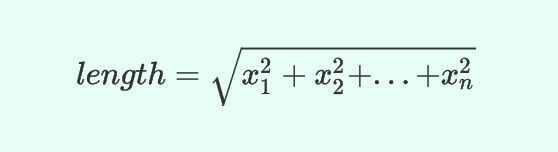

Посчитаем длину следующего вектора

In [174]:
vec = np.array([3, 4])

Для начала воспользуемся формулой: возведём все элементы в квадрат, посчитаем их сумму, а затем найдём квадратный корень. Найдите все перечисленные операции в данном коде

In [175]:
length = np.sqrt(np.sum(vec ** 2))
print(length)

5.0


Но можно было поступить проще. В NumPy есть специальный подмодуль linalg, который позволяет производить операции из линейной алгебры

Для вычисления длины вектора нам потребуется функция norm

In [176]:
length = np.linalg.norm(vec)
print(length)

5.0


Расстояние между двумя векторами, то есть расстояние между их концами, [в евклидовом пространстве] вычисляется как квадратный корень из суммы квадратов разностей соответствующих координат. Звучит сложно, поэтому лучше посмотрите на формулу (считаем расстояние между векторами X и Y):

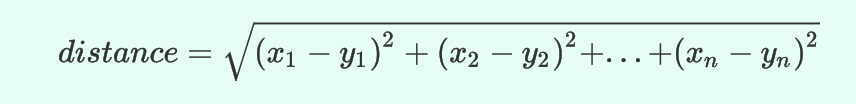

По сути, расстояние между векторами — это длина такого вектора, который является разностью этих векторов. В самом деле, при вычитании двух векторов вычитаются их соответствующие координаты

Реализуем вычисление расстояния в коде. Сначала — «сложным» способом напрямую из формулы

In [177]:
vec1 = np.array([0, 3, 5])
vec2 = np.array([12, 4, 7])
distance = np.sqrt(np.sum((vec1 - vec2) ** 2))
distance

12.206555615733702

А теперь применим более простой способ — используем уже известную нам функцию np.linalg.norm:

In [178]:
vec1 = np.array([0, 3, 5])
vec2 = np.array([12, 4, 7])
distance = np.linalg.norm(vec1 - vec2)
distance

12.206555615733702

Наконец, скалярным произведением двух векторов называют сумму произведений их соответствующих координат. Вот формула для скалярного произведения векторов X и Y из n координат

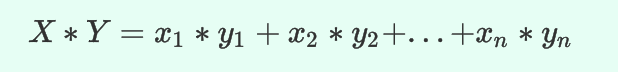

Откуда такое странное название? Слово «скаляр» — синоним слова «число». То есть результатом вычисления скалярного произведения векторов является число — скаляр. Дело в том, что существуют и другие произведения векторов, не все из которых дают на выходе число

Реализуем это в коде (по-английски скалярное произведение называют dot — точечный — или scalar product, отсюда и такое название переменной)

In [179]:
vec1 = np.arange(1, 6)
vec2 = np.linspace(10, 20, 5)
scalar_product = np.sum(vec1 * vec2)
scalar_product

250.0

Для этого используют функцию np.dot(x, y)

In [180]:
scalar_product = np.dot(vec1, vec2)
scalar_product

250.0

Скалярное произведение также имеет широкое применение в математике и других операциях с векторами. В частности, равенство скалярного произведения нулю означает перпендикулярность рассматриваемых векторов

In [181]:
x = np.array([25, 0])
y = np.array([0, 10])
np.dot(x, y)

0

## БАЗОВЫЕ СТАТИСТИЧЕСКИЕ ФУНКЦИИ ДЛЯ ВЕКТОРОВ

Функции np.min и np.max позволяют находить максимальное и минимальное значение в векторе. Их можно записывать как в виде np.min(<vector>), так и в виде <vector>.min():

In [182]:
vec = np.array([2,7,18,28,18,1,8,4])
print(vec.min())
# 1
np.max(vec)

1


28

Функция mean позволяет посчитать среднее значение

In [183]:
vec.mean()

10.75